# Memoization & Dynamic Programming 

### Topics to discuss today:

<ul>
    <li>Time and Space Complexity  of recursive fibonnaci</li>
    <li>The fibonacci Tree</li>
    <li>storing solutions to sub problems</li>
    <li>solving popular problems</li>
</ul>
<br><br><br><br>

### The Fibonacci sequence

In [ ]:
def fib(n):
    if n <= 2:
        return 1
    else:
        return fib(n-1) + fib(n-2)
fib(7)

13

Calculating the time space complexity of the Fibbonacci sequence


In [ ]:
# Dealing with time space in recursion

def dib(n):
    print(n)
    if n <=1:
        return 1
    else:
        return dib(n-1) #Extra call on the stack = O(n) time & space
dib(9)

9
8
7
6
5
4
3
2
1


1

## Trees

the fibonacci sequence can be visualized using a tree structure. Lets look at the elements of a tree before discussing the fibonnaci tree:

<img src="https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg" style="height:400px;">

Let's look at the fibonnaci tree:

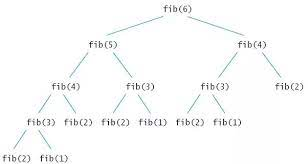

## Memoization

#### What is it?

In computing, memoization or memoisation is an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again. Memoization has also been used in other contexts (and for purposes other than speed gains), such as in simple mutually recursive descent parsing.

#### When should we use it?

Some problems are largely made of <b>overlapping subproblems</b>. When we find our code is solving the same problem multiple times over it's a good idea to store them so we don't have to recompute those solutions. This is known as Dynamic Programming 

In [ ]:
def fib(n,memo = {}):
    if n in memo:
        return memo[n]
    if n <= 2:
        return 1
    else:
        memo[n] =  fib(n-1) + fib(n-2)
        return memo[n]
fib(50)

12586269025

## TwoSum Problem

Given an array of integers, return indices of the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

In [ ]:
def twoNumberSum(array, targetSum):
    answer = []
    target_dict = {}
    
    for num in array:
        if num in target_dict:
            answer = [num, target_dict[num]]
             break
        else:
            target_dict[targetSum - num] = num

    return answer

In [49]:
from IPython.display import clear_output as clear
class User:
    def __init__(self,name):
        self.name = name
        self.properties = []

class Property:
    def __init__(self,name):
        self.name = name
        self.income = {}
        self.total_income = 0
        self.expenses = {}
        self.total_expenses = 0
        self.cashflow = 0
        self.investments = {}
        self.total_investments = sum(self.investments.values())
        self.roi = 0
        
class Income:
    def __init__(self,name,value):
        self.name = name
        self.value = value
        
class Expenses:
    def __init__(self,name,value):
        self.name = name
        self.value = value
        
class Investments:
    def __init__(self,name,value):
        self.name = name
        self.value = value
        
class Main():
    def __init__(self):
        self.users = []
        self.current_user = None
        self.current_property = None
        
    def create_user(self):
        name_input = input("Enter a username: ")
        if name_input.lower() in self.users:
            print("That username is already taken")
        else:
            user = User(name_input)
            self.users.append(user)
            self.current_user = user
            clear()
            print(f"{user.name} has been added as a user")
    
    def choose_user(self):
        if len(self.users) <= 1:
            print("You have one user!")
        for i in self.users:
            print(i.name)
        name_input = input("Pick a username: ")
        if name_input.lower() not in self.users:
            print("That username does not exist")
        else:
            self.current_user = name_input
            clear()
            print(f"Welcome {self.current_user.name}")
    
    def display_properties(self):
        if not self.current_user.properties:
            clear()
            print("You have 0 properties")
        else:
            clear()
            for i in self.current_user.properties:
                print(f"{i.name} - {i.roi}")
            print(f"You have a total of {len(self.current_user.properties)}")
       
    def delete_property(self):
        if not self.current_user.properties:
            clear()
            print("You have no property to delete!")
        else:
            for i in range(len(self.current_user.properties)):
                print(f"{i} {self.current_user.properties[i].name} - {self.current_user.properties[i].roi}")
            prop = input("Choose a property to delete by number or enter RETURN:  ")
            if prop.lower() == "return":
                return
            prop = int(prop)
            if prop >= len(self.current_user.properties):
                print(f"Invalid number")
            else:
                print(f"You have deleted {self.current_user.properties[prop].name}!")
                self.current_user.properties.remove(self.current_user.properties[prop])
                if not self.current_user.properties:
                    print("You now have 0 properties")
                else:
                    self.current_property = self.current_user.properties[-1]
                    clear()
                    print(f"Your current property has changed to {self.current_property.name}")
                
    
    def switch_property(self):
        if len(self.current_user.properties) <= 1:
            clear()
            print("You have one property! Go get more!")
        else:
            for i in range(len(self.current_user.properties)):
                print(f"{i} {self.current_user.properties[i].name} - {self.current_user.properties[i].roi}")
            prop = input("Choose a property to switch by number or enter RETURN:  ")
            if prop.lower() == "return":
                clear()
                return
            prop = int(prop)
            if prop >= len(self.current_user.properties):
                print(f"Invalid number")
            else:
                self.current_property = self.current_user.properties[prop]
                clear()
                print(f"You are now in {self.current_user.properties[prop].name}")
                
    def modify_property(self):
        if self.current_property == None:
            clear()
            print("You have no property selected!")
        else:
            clear()
            print(f"You are modifying {self.current_property.name}")
        while True:
            action = input("What would you like to modify? Income/Expense/Investment or RETURN ")
            
            if action.lower() == "income":
                self.mod_income()
            elif action.lower() == "expense":
                self.mod_expense()
            elif action.lower() == "investment":
                self.mod_inv()
            elif action.lower() == "return":
                return
            else:
                print("Invalid input!")
            
            breaking = input("Do you still have to modify other things further? Y/N")
            if breaking.lower() in ["n","no"]:
                self.current_property.cashflow = self.current_property.total_income - self.current_property.total_expenses
                self.calc_roi()
                self.show_property_roi()
                break
                
        
        
    def mod_income(self):
        while True:
            print("Please enter income information")
            income_name = input("Enter income name ")
            income_value = int(input("Enter income amount: "))
            inc = Income(income_name,income_value)
            self.current_property.income[income_name] = income_value
            print(f"You have added {income_name} as an income ")
            ret = input("Do you have more income to add? Y/N ")
            if ret.lower() in ["no","n"]:
                clear()
                self.current_property.total_income = sum(self.current_property.income.values())
                print(f"\n{self.current_property.total_income} is your total income\n")
                break
        
    
    def mod_expense(self):
        while True:
            print("Please enter expenses information ")
            expense_name = input("Enter expense name ")
            expense_value = int(input("Enter amount of expense "))
            exp = Expenses(expense_name,expense_value)
            self.current_property.expenses[expense_name] = expense_value
            print(f"You have added {expense_name} as an expense ")
            ret = input("Do you have more expenses to add? Y/N ")
            if ret.lower() in ["no","n"]:
                clear()
                self.current_property.total_expenses = sum(self.current_property.expenses.values())
                self.current_property.cashflow = self.current_property.total_income - self.current_property.total_expenses
                print(f"\n{self.current_property.total_expenses} is your total expenses\n")
                break
           
    
    def mod_inv(self):
        while True:
            print("Please enter investment information")
            inv_name = input("Enter investment name ")
            inv_value = int(input("Enter amount of investment "))
            inv = Investments(inv_name,inv_value)
            self.current_property.investments[inv_name] = inv_value
            print(f"You have added {inv_name} as an investment ")
            ret = input("Do you have more investments to add? Y/N ")
            if ret.lower() in ["no","n"]:
                clear()
                self.current_property.total_investments = sum(self.current_property.investments.values())
                print(f"\n{self.current_property.total_investments} is your total investments\n")
                break     

    def calc_roi(self):
        clear()
        self.current_property.roi = f"{((self.current_property.cashflow*12)/self.current_property.total_investments)*100} %"       
   
    def create_property(self):
        prop_name = input("Please enter a name for this property: ")
        prop_name = Property(prop_name)
        self.current_property = prop_name
        
        self.mod_income()
            
        self.mod_expense()
       
        self.mod_inv()
        
        self.calc_roi()
        
        self.show_property_roi()
       
        self.current_user.properties.append(prop_name)   
    
    def show_property_roi(self):
        print(f"{self.current_property.name} has a Cash on Cash ROI of {self.current_property.roi}")
        
    
    def run(self):
        print("Welcome to the BEST ROI CALCULATOR")
        if not self.users:
            self.create_user()
        if not self.current_user.properties:
            self.create_property()
            
            print("\nCongratulations on entering your first property!")
        while True:
            action = input("""
            
            What would you like to do?
            
            Create Property - create a new property and see its ROI
            
            Portfolio - displays your portfolio
            
            Choose Property - Switch current property
            
            Modify Property - modifies property information like income,expenses,investments
            
            Delete Property - deletes property
            
            Create User
            
            Switch Users - 
            
            Quit
            
            """)
            
            if action.lower() == "create property":
                self.create_property()
            elif action.lower() == "portfolio":
                self.display_properties()
            elif action.lower() == "choose property":
                self.switch_property()
            elif action.lower() == "modify property":
                self.modify_property()
            elif action.lower() == "delete property":
                self.delete_property()
            elif action.lower() == "switch users":
                self.choose_user()
            elif action.lower() == "create user":
                self.create_user()
            elif action.lower() == "quit":
                quit()
            else:
                print("Enter valid input!")
                
            
            

In [50]:
main = Main()

In [ ]:
main.run()

Welcome to the BEST ROI CALCULATOR


# 